In [2]:
!brew install scipy

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
c-blosc2        lexido          mdformat        policy_sentry   uni-algo
dissent         liblc3          morpheus        protoc-gen-js   valkey
ffmpeg@6        libscfg         msieve          rage            vfox
gitu            llvm@17         navidrome       ratchet
jnv             logdy           oj              redict
jtbl            manim           overarch        rustcat
kubecolor       mantra          parsedmarc      sysaidmin
==> New Casks
arctic                     godspeed                   phoenix-code
arm-performance-libraries  halloy                     requestly
boltai                     hhkb-studio                starnet2
capcut                     ireal-pro                  toneprint
cle

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [7]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    # x axis - Year
    # y axis - CSIRO Adjusted Sea Level
    fig = plt.figure()
    plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    # Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit
    # Plot the line of best fit over the top of the scatter plot
    # Make the line go through the year 2050 to predict the sea level rise in 2050

    # It calculates the slope, intercept, correlation coefficient, p-value, and standard error 
    # of the slope for the relationship between the 'Year' (independent variable) and the 'CSIRO Adj Sea Level' (dependent variable)
    res1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    # generates a range of x-values for plotting the regression line
    # df['Year'].min() returns the minimum value of the 'Year' column, which is the starting point
    # 2051 is the upper limit of the range (exclusive)
    # 1 is the step size 
    # np.arange() creates an array of evenly spaced values within the specified range
    x1 = np.arange(df['Year'].min(),2051,1)
    # calculates the corresponding y-values using the equation of the regression line
    # For each x-value in x1, the corresponding y-value is calculated using the equation of a straight line:
    # y = mx + b, where m is the slope and b is the y-intercept
    y1 = res1.intercept + res1.slope*x1
    plt.plot(x1,y1,color='red')

    # Create second line of best fit
    # Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset
    # Make the line also go through the year 2050 to predict the sea level rise in 2050
    # if the rate of rise continues as it has since the year 2000
    df2 = df[df['Year']>=2000]
    res2 = linregress(df2['Year'], df2['CSIRO Adjusted Sea Level'])
    x2 = np.arange(df2['Year'].min(),2051,1)
    # For each x-value in x2, the corresponding y-value is calculated using the equation of a straight line:
    # y = mx + b, where m is the slope and b is the y-intercept
    y2 = res2.intercept + res2.slope*x2
    plt.plot(x2,y2,color='green')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

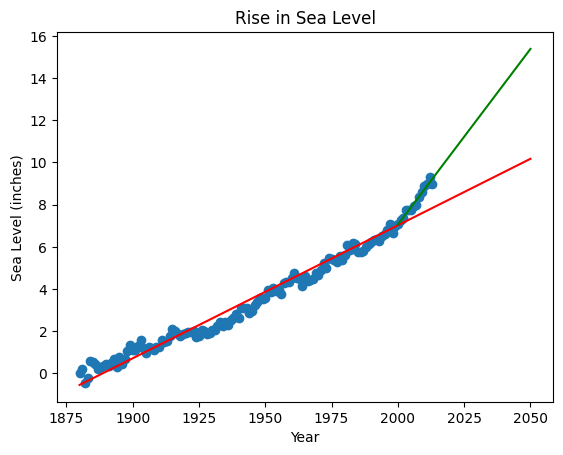

In [8]:
draw_plot()

The linregress function from scipy.stats is a convenient tool for performing linear regression analysis in Python. Linear regression is a statistical method used to model the relationship between two variables by fitting a linear equation to observed data. The resulting line of best fit provides insights into the relationship between the variables and can be used for making predictions.

Here's how the linregress function works:

Input Parameters:
x: Array-like input of independent variable values.
y: Array-like input of dependent variable values.

Output:
The function returns a LinregressResult object containing the following attributes:

slope: The slope of the regression line, which represents the change in the dependent variable (y) for a one-unit change in the independent variable (x).
intercept: The y-intercept of the regression line, which represents the predicted value of the dependent variable (y) when the independent variable (x) is zero.
rvalue: The correlation coefficient, which measures the strength and direction of the linear relationship between x and y. It ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
pvalue: The two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, indicating no relationship between x and y.
stderr: The standard error of the estimated slope.